In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data_frame = pd.read_csv('Regression_technique_for_TurboEngine_RUL-main\RUL_Train_001.csv')

In [5]:
data_frame.shape

(20631, 26)

In [4]:
data_frame.head()

,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,RUL
0,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


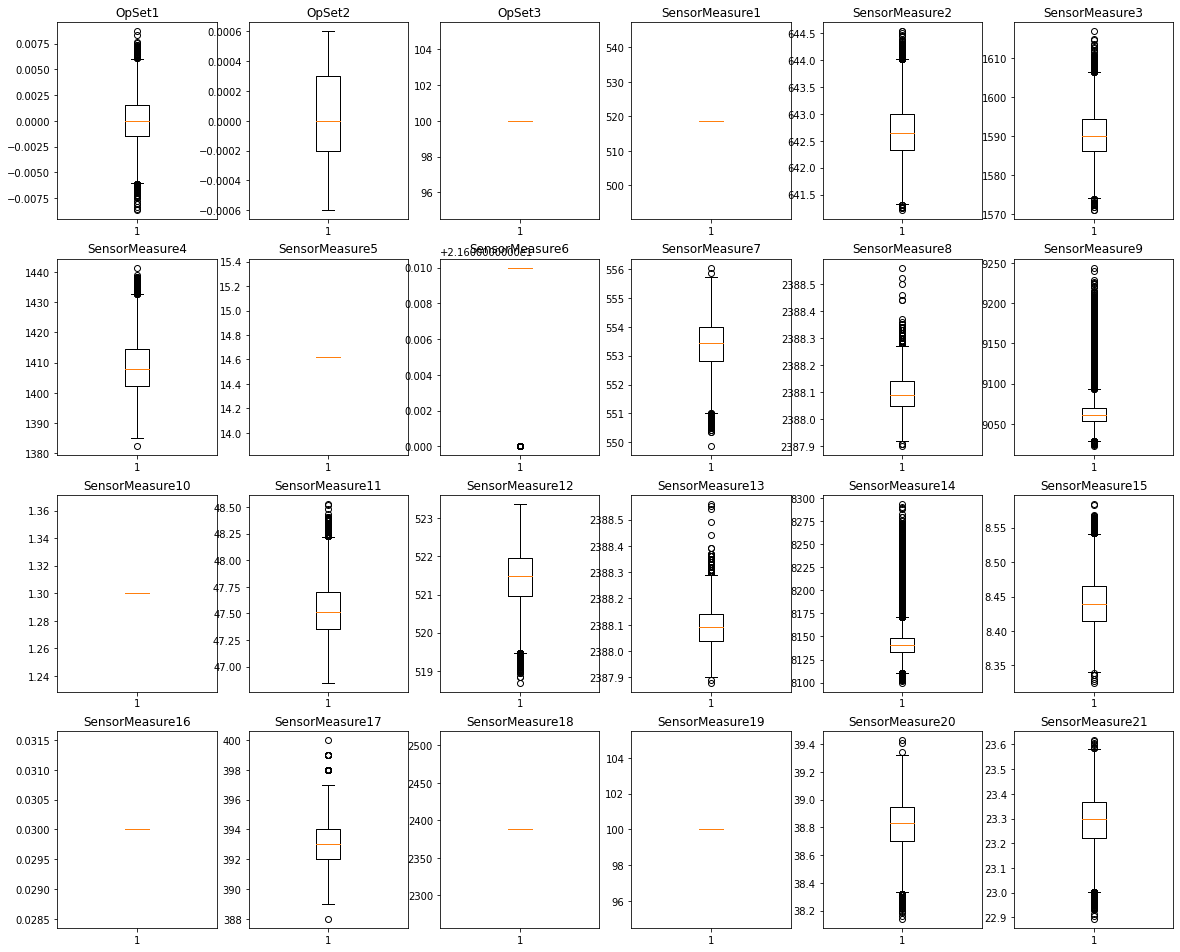

In [9]:
plt.figure(figsize=(20,21))
for i in np.arange(1,25):
    temp = data_frame.iloc[:,i]
    plt.subplot(5,6,i)
    plt.boxplot(temp)
    plt.title(data_frame.columns[i])
plt.show()

#### From the plot shown below we can see that certain features dont have any coorelation with Remaining Useful Life (RUL) and are thus blank ex. OpSet3, SensorMeasure5 etc)

<AxesSubplot:>

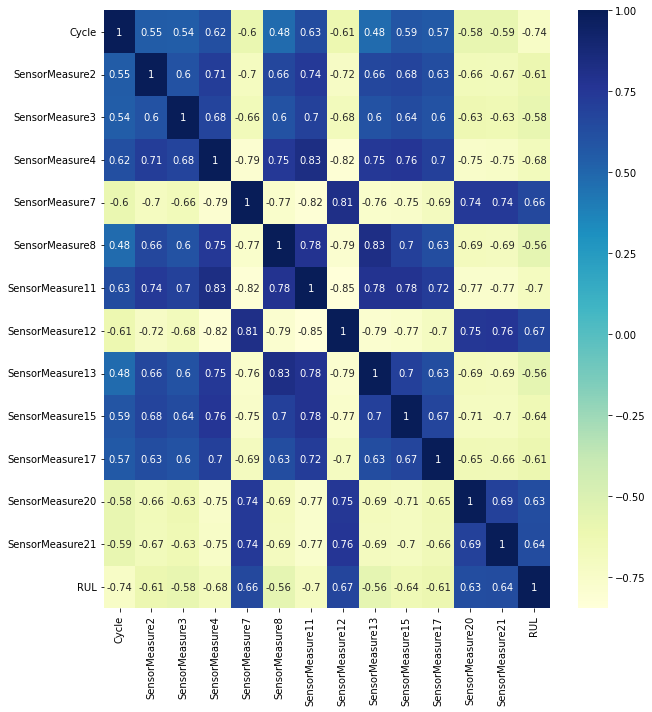

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,11))
corr = data_frame.corr()
# corr.style.background_gradient(cmap='YlGnBu')
import seaborn as sns
sns.heatmap(corr,cmap='YlGnBu',annot=True)

#### Drop all features which have a coorelation <0.5 with RUL

In [20]:
delete_columns = []

for col in data_frame.columns:
    corr = data_frame[col].corr(data_frame['RUL'])
    if abs(corr)> 0.5:
        pass
    else:
        delete_columns.append(col)

In [21]:
delete_columns

['OpSet1',
 'OpSet2',
 'OpSet3',
 'SensorMeasure1',
 'SensorMeasure5',
 'SensorMeasure6',
 'SensorMeasure9',
 'SensorMeasure10',
 'SensorMeasure14',
 'SensorMeasure16',
 'SensorMeasure18',
 'SensorMeasure19']

In [22]:
data_frame = data_frame.drop(columns=delete_columns)

In [23]:
data_frame

,Cycle,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure7,SensorMeasure8,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure15,SensorMeasure17,SensorMeasure20,SensorMeasure21,RUL
0,1,641.82,1589.70,1400.60,554.36,2388.06,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,191
1,2,642.15,1591.82,1403.14,553.75,2388.04,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190
2,3,642.35,1587.99,1404.20,554.26,2388.08,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189
3,4,642.35,1582.79,1401.87,554.45,2388.11,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188
4,5,642.37,1582.85,1406.22,554.00,2388.06,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,196,643.49,1597.98,1428.63,551.43,2388.19,48.07,519.49,2388.26,8.4956,397,38.49,22.9735,4
20627,197,643.54,1604.50,1433.58,550.86,2388.23,48.04,519.68,2388.22,8.5139,395,38.30,23.1594,3
20628,198,643.42,1602.46,1428.18,550.94,2388.24,48.09,520.01,2388.24,8.5646,398,38.44,22.9333,2
20629,199,643.23,1605.26,1426.53,550.68,2388.25,48.39,519.67,2388.23,8.5389,395,38.29,23.0640,1


<AxesSubplot:>

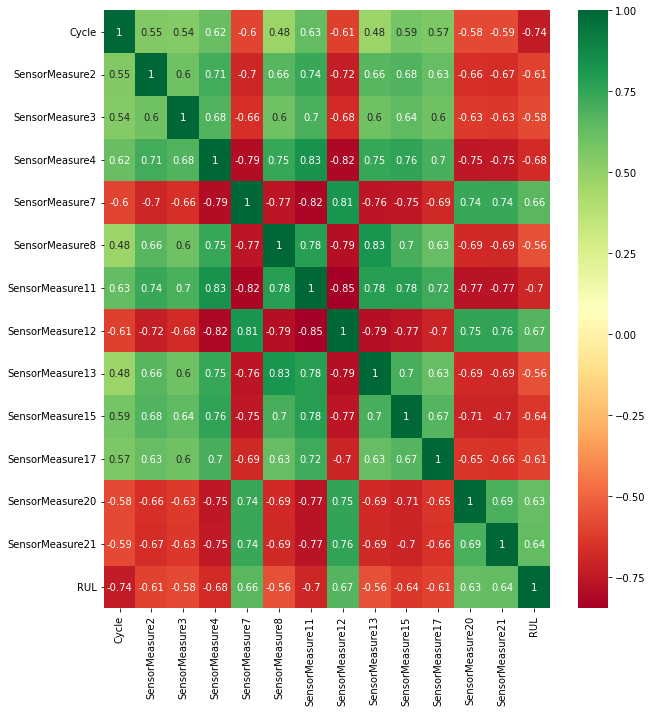

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,11))
corr = data_frame.corr()
import seaborn as sns
sns.heatmap(corr,cmap='RdYlGn',annot=True)

In [30]:
X = data_frame.iloc[:,0:13]
Y = data_frame.iloc[:,13]

In [31]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,Y)
print(model.feature_importances_)

[0.35693048 0.034889   0.02840492 0.09596287 0.07002353 0.02448161
 0.12651983 0.07116274 0.02658065 0.05513941 0.02770672 0.03662457
 0.04557368]


<AxesSubplot:>

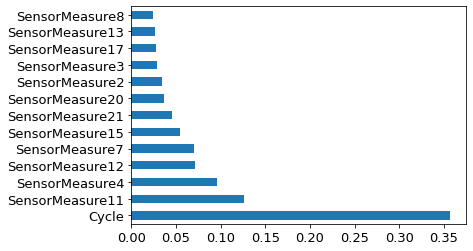

In [33]:
feature_importance = pd.Series(model.feature_importances_,index = X.columns)
feature_importance.nlargest(13).plot(kind='barh',fontsize=13)

In [34]:
feature_importance.keys()

Index(['Cycle', 'SensorMeasure2', 'SensorMeasure3', 'SensorMeasure4',
       'SensorMeasure7', 'SensorMeasure8', 'SensorMeasure11',
       'SensorMeasure12', 'SensorMeasure13', 'SensorMeasure15',
       'SensorMeasure17', 'SensorMeasure20', 'SensorMeasure21'],
      dtype='object')

In [47]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,shuffle=False)

In [49]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [51]:
train_pred = regressor.predict(X_train)
test_pred = regressor.predict(X_test)

In [52]:
from sklearn import metrics
print('RMSE on Train Set: ',np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))

print('RMSE on Test Set: ',np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))

RMSE on Train Set:  12.604079207528642
RMSE on Test Set:  50.90133180121506


In [53]:
feature_importance = feature_importance.sort_values(ascending=False)

In [55]:
feature_importance.keys()

Index(['Cycle', 'SensorMeasure11', 'SensorMeasure4', 'SensorMeasure12',
       'SensorMeasure7', 'SensorMeasure15', 'SensorMeasure21',
       'SensorMeasure20', 'SensorMeasure2', 'SensorMeasure3',
       'SensorMeasure17', 'SensorMeasure13', 'SensorMeasure8'],
      dtype='object')

In [56]:
feature_descending = data_frame[['Cycle', 'SensorMeasure11', 'SensorMeasure4', 'SensorMeasure12',
       'SensorMeasure7', 'SensorMeasure15', 'SensorMeasure21',
       'SensorMeasure20', 'SensorMeasure2', 'SensorMeasure3',
       'SensorMeasure17', 'SensorMeasure13', 'SensorMeasure8']]

In [57]:
feature_descending

,Cycle,SensorMeasure11,SensorMeasure4,SensorMeasure12,SensorMeasure7,SensorMeasure15,SensorMeasure21,SensorMeasure20,SensorMeasure2,SensorMeasure3,SensorMeasure17,SensorMeasure13,SensorMeasure8
0,1,47.47,1400.60,521.66,554.36,8.4195,23.4190,39.06,641.82,1589.70,392,2388.02,2388.06
1,2,47.49,1403.14,522.28,553.75,8.4318,23.4236,39.00,642.15,1591.82,392,2388.07,2388.04
2,3,47.27,1404.20,522.42,554.26,8.4178,23.3442,38.95,642.35,1587.99,390,2388.03,2388.08
3,4,47.13,1401.87,522.86,554.45,8.3682,23.3739,38.88,642.35,1582.79,392,2388.08,2388.11
4,5,47.28,1406.22,522.19,554.00,8.4294,23.4044,38.90,642.37,1582.85,393,2388.04,2388.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,196,48.07,1428.63,519.49,551.43,8.4956,22.9735,38.49,643.49,1597.98,397,2388.26,2388.19
20627,197,48.04,1433.58,519.68,550.86,8.5139,23.1594,38.30,643.54,1604.50,395,2388.22,2388.23
20628,198,48.09,1428.18,520.01,550.94,8.5646,22.9333,38.44,643.42,1602.46,398,2388.24,2388.24
20629,199,48.39,1426.53,519.67,550.68,8.5389,23.0640,38.29,643.23,1605.26,395,2388.23,2388.25


In [62]:
number_of_features = []
test_rmse = []
train_rmse = []

for i in range(1,13):
    number_of_features.append(i)

    X = feature_descending.iloc[:,0:i]
    Y = data_frame.iloc[:,13]

    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,shuffle=False)

    regressor = RandomForestRegressor()
    regressor.fit(X_train,Y_train)

    train_pred = regressor.predict(X_train)
    test_pred = regressor.predict(X_test)

    print('Total number of features actively being used: ',i)
    
    train_rmse.append(np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))
    print('RMSE on Train Set: ',np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))
    
    test_rmse.append(np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))
    print('RMSE on Test Set: ',np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))

    print('\n')

Total number of features actively being used:  1
RMSE on Train Set:  39.32953497365343
RMSE on Test Set:  60.35125852516824


Total number of features actively being used:  2
RMSE on Train Set:  23.492197713693695
RMSE on Test Set:  55.84494929638216


Total number of features actively being used:  3
RMSE on Train Set:  13.562263720699097
RMSE on Test Set:  52.85666420191759


Total number of features actively being used:  4
RMSE on Train Set:  13.25179237321363
RMSE on Test Set:  51.97551895910779


Total number of features actively being used:  5
RMSE on Train Set:  12.93901836919859
RMSE on Test Set:  51.71654176634797


Total number of features actively being used:  6
RMSE on Train Set:  12.925103044299814
RMSE on Test Set:  51.25419088291959


Total number of features actively being used:  7
RMSE on Train Set:  12.826515600422876
RMSE on Test Set:  51.366211980683254


Total number of features actively being used:  8
RMSE on Train Set:  12.78737481050559
RMSE on Test Set:  51.2392

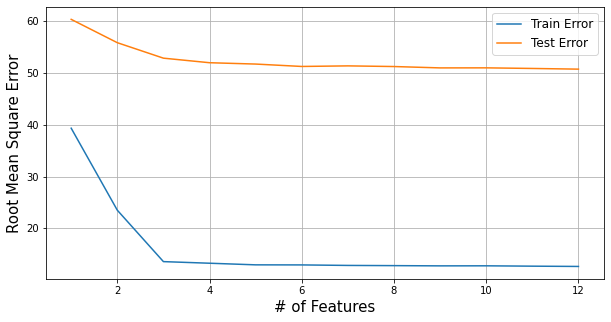

In [76]:
plt.figure(figsize=(10,5))
plt.plot(number_of_features,train_rmse)
plt.plot(number_of_features,test_rmse)

plt.legend(['Train Error','Test Error'],prop = {'size':12})
plt.xlabel('# of Features',fontsize=15)
plt.ylabel('Root Mean Square Error',fontsize=15)

plt.grid()
plt.show()